# An analysis of Vehicle fuel economy by EPA **(Enviromental Protection Agency)**

The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

In [130]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# load datasets 
veh_08 = pd.read_csv('all_alpha_08.csv')
veh_18 = pd.read_csv('all_alpha_18.csv')

## Data Overview

We have two data sets. One collected in 2008(veh_08) and the other in 2018 (veh_2018).

Columns Explained.

1. Model – vehicle make and model

2. Displ – engine displacement in liters

3. Cyl – number of engine cylinders

4. Trans – transmission type plus number of gears

        Auto - Automatic

        Man - Manual

        SemiAuto - Semi-Automatic

        SCV - Selectable Continuously Variable (e.g. CVT with paddles)

        AutoMan - Automated Manual

        AMS - Automated Manual-Selectable (e.g. Automated Manual with paddles)

        Other - Other

        CVT - Continuously Variable

        CM3 - Creeper/Manual 3-Speed

        CM4 - Creeper/Manual 4-Speed

        C4 - Creeper/Manual 4-Speed

        C5 - Creeper/Manual 5-Speed

        Auto-S2 - Semi-Automatic 2-Speed

        Auto-S3 - Semi-Automatic 3-Speed

        Auto-S4 - Semi-Automatic 4-Speed

        Auto-S5 - Semi-Automatic 5-Speed

        Auto-S6 - Semi-Automatic 6-Speed

        Auto-S7 - Semi-Automatic 7-Speed

5. Drive – 2-wheel Drive, 4-wheel drive/all-wheel drive
6. Fuel – fuel(s)
7. Cert Region –

        CA - California

        CE - Calif. + NLEV (Northeast trading area)

        CF - Clean Fuel Vehicle

        CL - Calif. + NLEV (All states)

        FA - Federal All Altitude

        FC - Tier 2 Federal and Calif.

        NF - CFV + NLEV(ASTR) + Calif.

        NL - NLEV (All states)
    
8. Stnd – vehicle emissions standard code. 
9. Stnd Description – vehicle emissions standard description.
10. Underhood ID – engine family or test group ID. 
11. Veh Class – EPA vehicle class. 
12. Air Pollution Score (Smog Rating)
13. City MPG – city fuel economy in miles per gallon.
14. Hwy MPG – highway fuel economy in miles per gallon.
15. Cmb MPG – combined city/highway fuel economy in miles per gallon.
16. Greenhouse Gas Score (Greenhouse Gas Rating).
17. SmartWay – Yes, No, or Elite. 
18. Comb CO2 – combined city/highway CO2 tailpipe emissions in grams per mile.

## 1  Questions to the data

1. Are more models using alternative sources of fuel? By how much?

2. How much have vehicle classes improved in fuel economy?

3. What are the characteristics of SmartWay vehicles?

4. What features are associated with better fuel economy?

5. For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?



## 2. Assessing the data.

1. What is the number of samples in each dataset.
2. What is the number of columns in each dataset.
3. Are there duplicate rows in each dataset.
4. Which datatypes do we have in the columns.
4. Are there columns with missing values.
5. Number of non-null unique values for features in each dataset.
6. What those unique values are and counts for each.




In [132]:
# Glimpse at the 2008 dataset
veh_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [133]:
# Glimpse at the 2018 data 
veh_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


### Number of samples (rows & columns)

In [134]:
# What is the nummber of samples in the 2008 data
veh_08.shape

(2404, 18)

In [135]:
# dataframe info
veh_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [136]:
# What is the nummber of samples in the 2018 data
veh_18.shape

(1611, 18)

In [137]:
# datafrmae info
veh_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

### Duplicates

In [138]:
# Are there duplicates in the 2008 data? If any, how many?
veh_08.duplicated().sum()

25

In [139]:
# Are there duplicates in the 2018 data? If any, how many?
veh_18.duplicated().sum()

0

### Missing values

In [140]:
# Are there columns with missing data in the 2008 dataset?
veh_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [141]:
# Are there columns with missing data in the 2008 dataset?
veh_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

### What are the data types in the two datasets?

In [142]:
# data types in 2008 data
veh_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [143]:
# data types in 2018 data
veh_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

### Number and examples of non-null unique values for features in each dataset. The variables

1. smartway
2. fuel
3. trans
4. region

In [144]:
# 2008 data number of unique smartways & names of the unique smartways
print(veh_08.SmartWay.nunique())
veh_08.SmartWay.unique()

2


array(['no', 'yes'], dtype=object)

In [145]:
# 2018 data number of unique smartways & names of the unique smartways
print(veh_18.SmartWay.nunique())
veh_18.SmartWay.unique()

3


array(['No', 'Yes', 'Elite'], dtype=object)

In [146]:
# 2008 data num of unique fuel  used & names of the unique fuel
print(veh_08.Fuel.nunique())
veh_08.Fuel.unique() 

5


array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [147]:
# 2018 data num of unique fuel  used & names of the unique fuel
print(veh_18.Fuel.nunique())
veh_18.Fuel.unique() 

5


array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

In [148]:
# 2008 data number of transmission systems and their unique names
print(veh_08.Trans.nunique())
veh_08.Trans.unique()

14


array(['Auto-S5', 'Man-6', 'Auto-S6', 'Auto-AV', 'Auto-S7', 'Auto-L4',
       'Auto-L6', 'Auto-4', 'Man-5', 'Auto-L5', nan, 'Auto-6', 'S8',
       'Auto-S4', 'Auto-L7'], dtype=object)

In [149]:
# 2018 data number of transmission systems and their unique names
print(veh_18.Trans.nunique())
veh_18.Trans.unique()

26


array(['SemiAuto-6', 'AMS-8', 'SemiAuto-9', 'AutoMan-6', 'Auto-8',
       'AMS-6', 'AMS-7', 'Man-6', 'SemiAuto-8', 'SemiAuto-7', 'Auto-6',
       'Auto-10', 'SemiAuto-10', 'Man-7', 'Auto-9', 'CVT', 'Auto-4',
       'AutoMan-7', 'SCV-7', 'Auto-1', 'SCV-10', 'Auto-7', 'Man-5',
       'SCV-8', 'SCV-6', 'SemiAuto-5'], dtype=object)

In [150]:
# 2008 data number of certified sales regions & unique region names
print(veh_08['Sales Area'].nunique())
veh_08['Sales Area'].unique()

3


array(['CA', 'FA', 'FC'], dtype=object)

In [151]:
# 2018 data number of certified sales regions & unique region names
print(veh_18['Cert Region'].nunique())
veh_18['Cert Region'].unique()

2


array(['FA', 'CA'], dtype=object)

#### Key take aways

1. Number of rows: veh_08 has 2404 while veh_18 has 1611
2. Both have 18 columns
3. Duplicate row: veh_08 has 25 while veh_18 has none
4. Missing data rows: veh_08 has 199 while veh_18 has 2
5. Unique values: [veh_08, veh_18]
    smartways: [2, 3]
    Fuel: [5, 5]
    Sales Area / Cert Region: [3, 2]
    Trans: [14, 26]

## 3. Data Cleaning & Transformation

1. Drop extraneous columns 
2. Rename columns
3. Filter needed rows
4. Drop Nulls
5. Drop duplicates
6. Fix data types

### 3.1 Drop extraneous columns.

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.

Columns to Drop:
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'

From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [152]:
# view datasets
veh_08.head(2)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no


In [153]:
# drop some columns in the 2008 dataset
veh_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
veh_08.head(2)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


In [154]:
# Refresh to see what the original 2018 dataset contains
veh_18.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


In [155]:
# drop some columns in the 2018 dataset
veh_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis =1, inplace=True)

# confirm changes
veh_18.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No


### 3.2 Rename columns

We have two columns with similar data but different names. 'Sales Area' in veh_08 data and 'Cert Region' in veh_18 data.
Change/ rename Sale Area to Cert Region

In [156]:
# Rename column
veh_08.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

# Confirm changed name
veh_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [157]:
# replace spaces with underscores and lowercase labels for 2008 dataset
veh_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

# confirm changes
veh_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [158]:
# replace spaces with underscores and lower case labels for the 2018 dataset
veh_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

# confirm changes
veh_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [159]:
# confirm column labels for 2008 and 2018 datasets are identical
veh_08.columns == veh_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [160]:
# make sure they're all identical
(veh_08.columns == veh_18.columns).all()

True

### 3.3 Filter rows
For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

In [161]:
# how many rows and columns do we have inboth datasets
print(veh_08.shape)
veh_18.shape

(2404, 14)


(1611, 14)

In [162]:
# filter datasets by cert_region - California standards
veh_08 = veh_08.query('cert_region == "CA"')
veh_18 = veh_18.query('cert_region == "CA"')

In [163]:
# confirm the only certified region is California
veh_08['cert_region'].unique()

array(['CA'], dtype=object)

In [164]:
# confirm the only certified region is California
veh_18['cert_region'].unique()

array(['CA'], dtype=object)

In [165]:
# drop cert_region column in both datasets
veh_08.drop('cert_region', axis=1, inplace=True)
veh_18.drop('cert_region', axis=1, inplace=True)

In [166]:
#confirm reduced columns
print(veh_08.shape)
veh_18.shape

(1084, 13)


(798, 13)

### 3.4 Drop nulls
Drop any rows in both datasets that contain missing values.

In [167]:
# which columns have null values in the veh_08 dataset?
veh_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [168]:
# drop null rows
veh_08.dropna(inplace=True)

In [169]:
# check changes took effect
veh_08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [170]:
# which columns have null values in the veh_01 dataset?
veh_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [171]:
# drop na s
veh_18.dropna(inplace=True)

In [172]:
# confirm dropping
veh_18.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [173]:
# has number of rows decreased
print(veh_08.shape)
veh_18.shape

(1009, 13)


(797, 13)

### 3.5 Depude / Drop duplicates
Drop any duplicate rows in both datasets.

In [174]:
# check for duplicates
print(veh_08.duplicated().sum())
print(veh_18.duplicated().sum())

23
3


In [175]:
# drop duplicates in both datasets
veh_08.drop_duplicates(inplace=True)
veh_18.drop_duplicates(inplace=True)

In [176]:
# print number of duplicates again to confirm dedupe - should both be 0
print(veh_08.duplicated().sum())
print(veh_18.duplicated().sum())

0
0


In [177]:
# number of samples
print(veh_08.shape)
print(veh_18.shape)

(986, 13)
(794, 13)


### 3.6 Fix data types

In [178]:
# check datatypes and a glimpse of the data associated
veh_08.dtypes


model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [179]:
# view a sample of associated data
veh_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [180]:
# check datatypes and a glimpse of the data associated
veh_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [181]:
# view a sample of associated data
veh_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No


In [182]:
veh_08.cyl.unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

In [183]:
veh_18.cyl.unique()

array([ 6.,  4.,  5., 12., 16.,  8.,  3.])

In [184]:
veh_08.air_pollution_score.unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

In [185]:
veh_18.air_pollution_score.unique()

array([3, 1, 7, 5, 6], dtype=int64)

In [186]:
veh_08.greenhouse_gas_score.unique()

array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '9', '10', '7/6'],
      dtype=object)

In [187]:
veh_18.greenhouse_gas_score.unique()

array([ 5,  4,  6,  7,  2,  1, 10,  3,  9,  8], dtype=int64)

Key take aways

1. cyl in veh_08 is a a string while in veh_18 it is a float

        Extract int values from the strings in the 2008 cyl column.

        Convert the floats in the 2018 dataset into ints


2. air_pollution_score is a string in veh_08 while an int in veh_18.

        convert the strings into floats in the 2008 data.
        
        convert ints into floats in 2018 data.

3. Convert the following columns from strings to floats
        
        city_mpg in both (2008 & 2018) data

        hwy_mpg in both (2008 & 2018) data

        cmb_mpg in both (2008 & 2018) data

4. Greenhouse_score in 2008 data to be converted from a string to int.


#### 3.6.1 # Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [188]:
# check value counts for the 2008 cyl column
veh_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [189]:
# Extract int from strings in the 2008 cyl column
veh_08['cyl'] = veh_08['cyl'].str.extract('(\d+)').astype(int)

In [190]:
# Check value counts for 2008 cyl column again to confirm the change
veh_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [191]:
# convert 2018 cyl column to int
veh_18['cyl'] = veh_18['cyl'].astype(int)

#### 3.6.2 Fix `air_pollution_score` datatype
- 2008: convert string to float.
- 2018: convert int to float.

In [192]:
# inspect the type of data
veh_08['air_pollution_score'].unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

In [193]:
# inspect the type of data
veh_18['air_pollution_score'].unique()

array([3, 1, 7, 5, 6], dtype=int64)

Looks like this isn't going to be as simple as converting the datatype. The air pollution score value in one of the rows is "6/4"

In [194]:
# investigate the row 
veh_08[veh_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


##### It's not just the air pollution score!

The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! 

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

In [195]:
# First, let's get all the hybrids in 2008
hb_08 = veh_08[veh_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [196]:
# hybrids in 2018
hb_18 = veh_18[veh_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [197]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [198]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [199]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [200]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [201]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [202]:
# drop the original hybrid rows
veh_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
veh_08 = veh_08.append(new_rows, ignore_index=True)

In [203]:
# check that all the original hybrid rows with "/"s are gone
veh_08[veh_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [204]:
veh_08.shape

(987, 13)

#### Repeat this process for 2018 data

In [205]:
hb_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite


In [206]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

#### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [207]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [208]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
veh_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
veh_18 = veh_18.append(new_rows, ignore_index=True)

In [209]:
# check that they're gone
veh_18[veh_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [210]:
veh_18.shape

(832, 13)

#### Now we can comfortably continue the changes needed for `air_pollution_score`! 
- 2008: convert string to float
- 2018: convert int to float

In [211]:
# convert string to float for 2008 air pollution column
veh_08.air_pollution_score = veh_08.air_pollution_score.astype(float)

In [212]:
# convert int to float for 2018 air pollution column
veh_18.air_pollution_score = veh_18.air_pollution_score.astype(float)

#### 3.6.3 Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [213]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in mpg_columns:
    veh_08[c] = veh_08[c].astype(float)
    veh_18[c] = veh_18[c].astype(float)

#### 3.6.4 Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [214]:
# convert from float to int
veh_08['greenhouse_gas_score'] = veh_08['greenhouse_gas_score'].astype(int)
veh_18['greenhouse_gas_score'] = veh_18['greenhouse_gas_score'].astype(int)

#### Confirm data type changes

In [215]:
veh_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [216]:
veh_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [217]:
# Do both data types coincide?
veh_08.dtypes == veh_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

## 4. Exploratory Data Analysis **(EDA)**
Explore the dataset with scatter plots and histograms to investigate correlations and distributions

### 4.1 Explore distribution of green house gas score

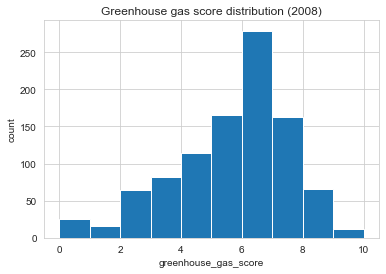

In [218]:
# Explore the distribution of green house score in 2008
sns.set_style('whitegrid')

fig, ax = plt.subplots()
ax.hist(veh_08['greenhouse_gas_score'])
ax.set_xlabel('greenhouse_gas_score')
ax.set_ylabel('count')
ax.set_title('Greenhouse gas score distribution (2008)')
plt.show()

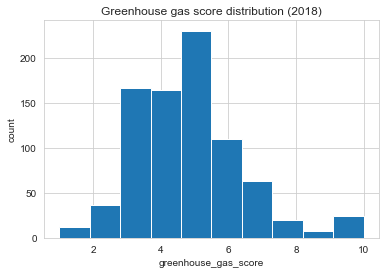

In [219]:
# Explore the distribution of green house score in 2018
sns.set_style('whitegrid')

fig, ax = plt.subplots()
ax.hist(veh_18['greenhouse_gas_score'])
ax.set_xlabel('greenhouse_gas_score')
ax.set_ylabel('count')
ax.set_title('Greenhouse gas score distribution (2018)')
plt.show()

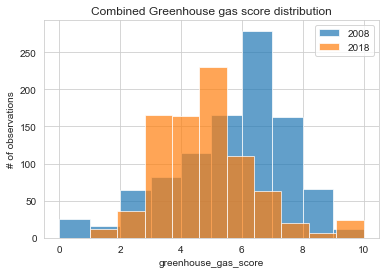

In [220]:
fig, ax = plt.subplots()
# Plot a histogram of greenhouse_gas_score in 2008
ax.hist(veh_08['greenhouse_gas_score'], label = '2008', alpha=0.7)
# Compare to histogram of  greenhouse_gas_score in 2018
ax.hist(veh_18['greenhouse_gas_score'], label = '2018', alpha=0.7)
ax.set_xlabel('greenhouse_gas_score')
ax.set_ylabel('# of observations')
ax.set_title('Combined Greenhouse gas score distribution')
ax.legend()
plt.show()

### 4.2 Explore the distribution of combined miles per gallon.

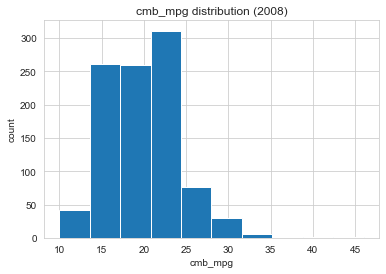

In [221]:
# Explore the distribution of cmb_mpg in 2008

fig, ax = plt.subplots()
ax.hist(veh_08['cmb_mpg'])
ax.set_xlabel('cmb_mpg')
ax.set_ylabel('count')
ax.set_title('cmb_mpg distribution (2008)')
plt.show()

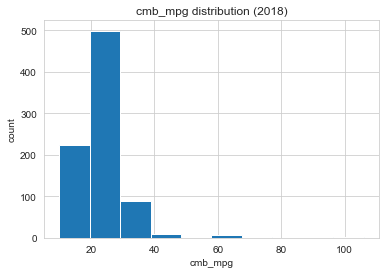

In [222]:
# Explore the distribution of cmb_mpg in 2018

fig, ax = plt.subplots()
ax.hist(veh_18['cmb_mpg'])
ax.set_xlabel('cmb_mpg')
ax.set_ylabel('count')
ax.set_title('cmb_mpg distribution (2018)')
plt.show()

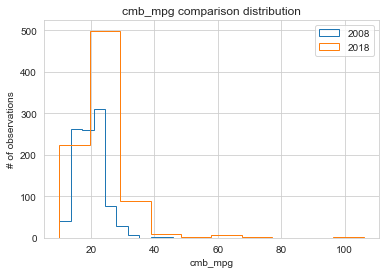

In [223]:
fig, ax = plt.subplots()
# Plot a histogram of cmb_mpg in 2008
ax.hist(veh_08['cmb_mpg'], label = '2008', histtype='step')
# Compare to histogram of  greenhouse_gas_score in 2018
ax.hist(veh_18['cmb_mpg'], label = '2018', histtype='step')
ax.set_xlabel('cmb_mpg')
ax.set_ylabel('# of observations')
ax.set_title('cmb_mpg comparison distribution')
ax.legend()
plt.show()

### 4.3 Comparison between the engine displacement and combined miles per gallon.

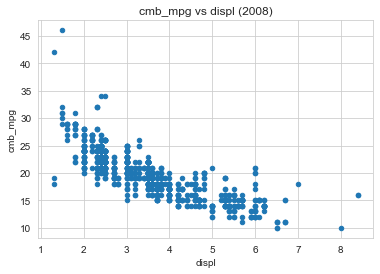

In [224]:
veh_08.plot(x='displ', y='cmb_mpg', kind='scatter',  title='cmb_mpg vs displ (2008)');

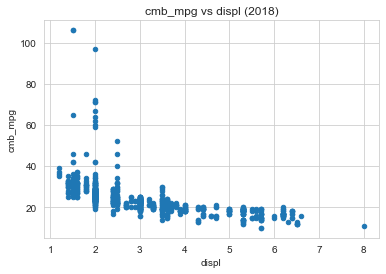

In [225]:
veh_18.plot(x="displ", y="cmb_mpg", kind="scatter", title='cmb_mpg vs displ (2018)');

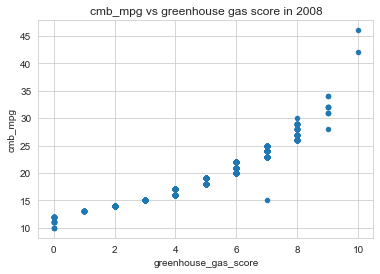

In [226]:
veh_08.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter', title='cmb_mpg vs greenhouse gas score in 2008');

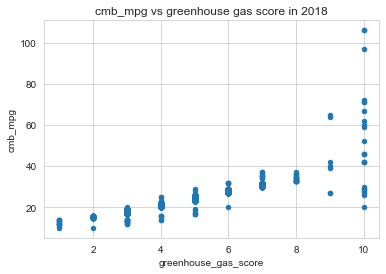

In [227]:
veh_18.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter', title='cmb_mpg vs greenhouse gas score in 2018');

Key take aways

1. The greenhouse gas score distribution is more skewed in the right in 2008.
2. Between 2008 and 2018, the cmb_mpg becomes more skewed to to the right.
3. There is a negative correlation between displacement and combined mpg.
4. There is a positive  correlation between greenhouse gas score and combined mpg.

## 5. Analysis Questions 

- Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
- How much have vehicle classes improved in fuel economy (increased in mpg)?
- What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
- What features are associated with better fuel economy (mpg)?
- For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which     vehicle improved the most?

### 5.1 Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [228]:
# fuels in 2008
veh_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [229]:
# fuels in 2018
veh_18['fuel'].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In 2008, the main source of fuel is Gasoline. Alternatives are ethanol & CNG.

In 2018, the main source of fuel is Gasoline. Alternatives are Ethanol and Electricity.

In [230]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = veh_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [231]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = veh_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

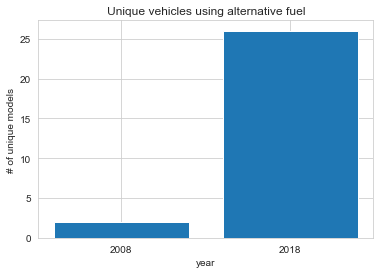

In [232]:
# Visualization of number of unique models using alternative sources of fuel.
fig, ax = plt.subplots()

ax.bar(['2008', '2018'],[alt_08, alt_18])
ax.set_xlabel('year')
ax.set_ylabel('# of unique models')
ax.set_title('Unique vehicles using alternative fuel')
plt.show()

Since 2008, the number of unique models using alternative sources of fuel increased by 24. 

Difference in proportions between 2008 & 2018

In [233]:
# total unique models each year
total_08 = veh_08.model.nunique()
total_18 = veh_18.model.nunique()
total_08, total_18

(377, 357)

In [234]:
# Proportion of unique models using alternate fuel
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

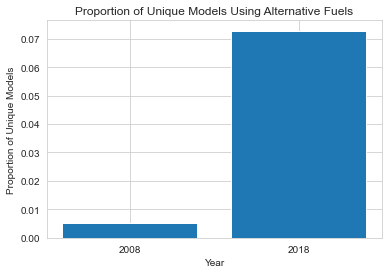

In [235]:
# Visualization of the proportions.
plt.bar(['2008', '2018'], [prop_08, prop_18])
plt.title('Proportion of Unique Models Using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Proportion of Unique Models')
plt.show();

### 5.2 How much have vehicle classes improved in fuel economy?  

In [236]:
# fuel economy of vehicle classes in 2008
mod_08 = veh_08.groupby('veh_class').cmb_mpg.mean().sort_values(ascending=False)
mod_08

veh_class
station wagon    22.366667
midsize car      21.601449
small car        21.105105
minivan          19.117647
large car        18.509091
SUV              18.471429
pickup           16.277108
van              14.952381
Name: cmb_mpg, dtype: float64

In [237]:
# fuel economy of vehicle classes in 2008
mod_18 = veh_18.groupby('veh_class').cmb_mpg.mean().sort_values(ascending=False)
mod_18

veh_class
midsize car        27.884058
station wagon      27.529412
small car          25.421053
small SUV          24.074074
large car          23.409091
minivan            20.800000
pickup             18.589744
special purpose    18.500000
standard SUV       18.197674
Name: cmb_mpg, dtype: float64

In [238]:
# how much has the fuel economy increased by for each vehicle class
inc = mod_18 - mod_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

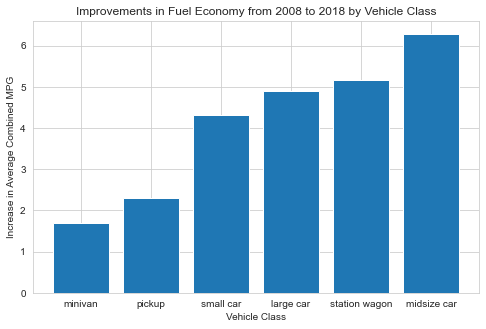

In [239]:
# Visualization showing improvement in fuel efficiency between 2008 and 2018
# only plot the classes that exist in both years
inc1 = inc.dropna().sort_values()
plt.subplots(figsize=(8, 5))
plt.bar(inc1.index, inc1)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');


### 5.3 What are the characteristics of SmartWay vehicles? Have they changed over time?

In [240]:
# smartway labels for 2008
veh_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [241]:
# get all smartway vehicles in 2008
smart_08 = veh_08.query('smartway == "yes"')

In [242]:
# smartway labels for 2018
veh_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [243]:
# get all smartway vehicles in 2018
smart_18 = veh_18.query('smartway in ["Yes", "Elite"]')

In [244]:
# explore smartway vehicles
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [245]:
# explore smartway vehicles
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### 5.4 What features are associated with better fuel economy?

Explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [246]:
top_08 = veh_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [247]:
top_18 = veh_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### 5.5 For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which     vehicle improved the most?

1. Rename 2008 columns to distinguish from 2018 columns after the merge
To do this, use pandas' rename() with a lambda function.In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

The lambda function should look something like this: lambda x: x[:10] + "_2008"

In your rename, don't forget to specify the parameter columns= when you add the lambda function!

2. Perform inner merge
To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

Perform an inner merge with the left on model_2008 and the right on model.

In [248]:
# rename 2008 columns
veh_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [249]:
# view to check names
veh_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [250]:
# merge datasets
veh_combined = veh_08.merge(veh_18, left_on='model_2008', right_on='model', how='inner')

In [251]:
# view to check merge
veh_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [252]:
veh_combined.shape

(922, 26)

In [253]:
# Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model

# To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

model_mpg = veh_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [254]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [255]:
# Create a new column, mpg_change, with the change in mpg

# Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [256]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


Find the vehicle that improved the most

Find the max mpg change, and then use query or indexing to see what model it is!

In [257]:
max_change = model_mpg['mpg_change'].max()

max_change

16.53333333333334

In [258]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
